# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     829.7
Date:                Tue, 14 May 2024   Prob (F-statistic):           4.88e-40
Time:                        16:35:08   Log-Likelihood:                -2.9565
No. Observations:                  50   AIC:                             13.91
Df Residuals:                      46   BIC:                             21.56
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8221      0.091     52.861      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.27824761  4.76674036  5.21675802  5.60220405  5.90640002  6.12482583
  6.26586232  6.34941436  6.40364052  6.46032669  6.54966376  6.69528733
  6.91039446  7.19557543  7.53871674  7.91699135  8.30060908  8.65771106
  8.95960404  9.18547465  9.3258089   9.3839554   9.3755751   9.32606831
  9.26640146  9.22801942  9.23767919  9.31305381  9.45982872  9.67076767
  9.92690159 10.20064518 10.4603291  10.67540312 10.82145548 10.88422363
 10.86193756 10.76561059 10.61722993 10.44614421 10.28424161 10.16071074
 10.09724499 10.10447837 10.18023844 10.30990314 10.46880322 10.6262753
 10.7506998  10.81469591]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.7843756  10.62631283 10.35928604 10.02608886  9.6830528   9.38625528
  9.17778996  9.07546071  9.06842264  9.11983727]


## Plot comparison

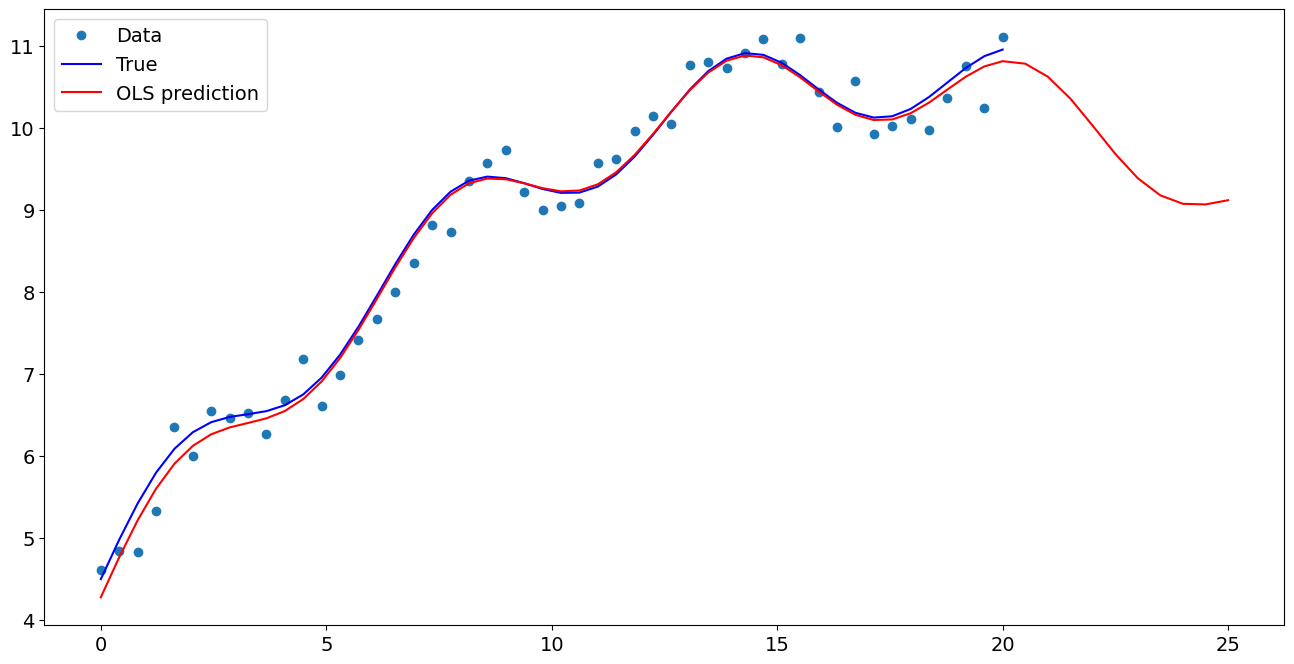

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.822077
x1                  0.522496
np.sin(x1)          0.478843
I((x1 - 5) ** 2)   -0.021753
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.784376
1    10.626313
2    10.359286
3    10.026089
4     9.683053
5     9.386255
6     9.177790
7     9.075461
8     9.068423
9     9.119837
dtype: float64